In [1]:
import yfinance
import numpy as np
import pandas as pd

# Download Prices Data

Using the yfinance library to download daily price data.

In [27]:
# @title Change this to get data for different stock
symbol = "AAPL" # @param {type:"string"}
start_date = "2017-01-01" # @param {type:"string"}
end_date = "2021-12-31" # @param {type: "string"}

ticker = yfinance.Ticker(symbol)
prices = ticker.history(period="day", start=start_date, end=end_date)

In [28]:
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,27.137805,27.262011,26.894080,27.219828,115127600,0.0,0.0
2017-01-04,27.149532,27.304204,27.126097,27.189371,84472400,0.0,0.0
2017-01-05,27.165932,27.386222,27.140154,27.327635,88774400,0.0,0.0
2017-01-06,27.367474,27.690879,27.294826,27.632292,127007600,0.0,0.0
2017-01-09,27.641668,27.988508,27.639326,27.885393,134247600,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-23,175.125322,176.121201,174.547711,175.553543,68356600,0.0,0.0
2021-12-27,176.360215,179.676494,176.340308,179.586868,74919600,0.0,0.0
2021-12-28,179.417557,180.582734,177.794270,178.551132,79144300,0.0,0.0


# Analysis

Analysising the distribution range of current close to next low and current close to next high.

### Split the data into buy and sell

In [4]:
length = len(prices)
batches = 2
total_batches = length // batches
max_length = total_batches * batches
dates = np.array(prices.index)[-max_length:].reshape(-1, batches)
buy_mask = dates[:, 0]
sell_mask = dates[:, -1]

### Calculate current to next low

Basicly getting an idea the distribution of when prices is keep.

In [5]:
current_close = prices.loc[buy_mask, "Close"].reset_index(drop=True)

In [6]:
next_low = prices.loc[sell_mask, "Low"].reset_index(drop=True)

Getting the log percentage of the dropped prices to see where the underline buying pressure.

<AxesSubplot: >

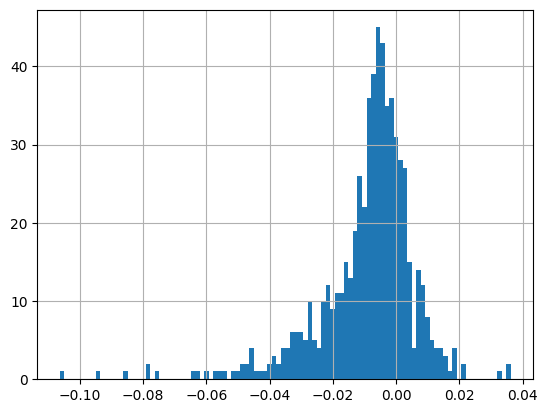

In [8]:
dropped = (next_low / current_close).apply(np.log)
dropped.hist(bins=100)

### Calculate current to next high

Distribution of when sell pressure is formed.

In [10]:
next_high = prices.loc[sell_mask, "High"].reset_index(drop=True)

Getting the log percentage of the hyped prices to see where the underline selling pressure.

<AxesSubplot: >

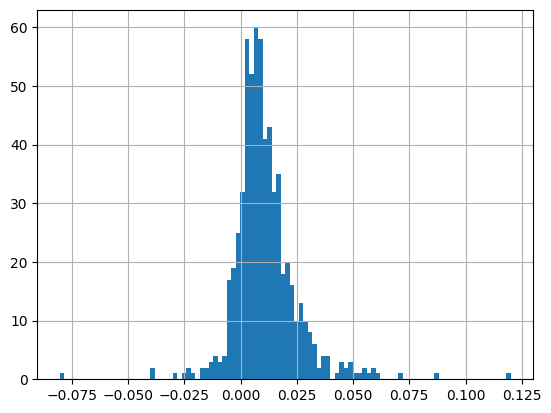

In [11]:
hyped = (next_high / current_close).apply(np.log)
hyped.hist(bins=100)

Now we have a basic understand of the distribution of both low and high prices, let's take a look if the movement of the price during the buy day has an effect on the distribution.

### Mask to see if day is red (down) or blue (up)

In [13]:
is_up = prices.Close > prices.Open
is_buy_up = is_up.loc[buy_mask].reset_index(drop=True)

Check if the distribution is different for buying pressure if when the stock was up and when the stock was down.

In [16]:
price_up = current_close.loc[is_buy_up]
price_down = current_close.loc[~is_buy_up]

<AxesSubplot: >

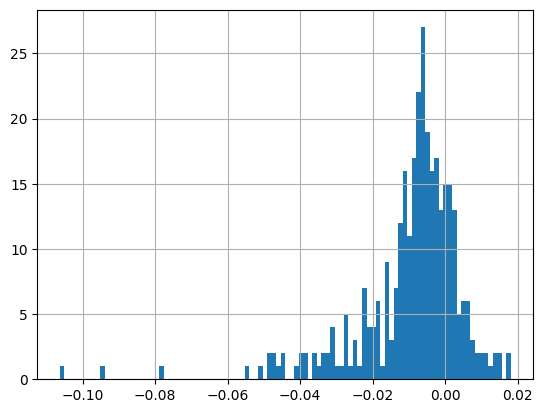

In [17]:
# Next Low prices
up_next_low = next_low.loc[is_buy_up]
up_drop = (up_next_low / price_up).apply(np.log)
up_drop.hist(bins=100)

<AxesSubplot: >

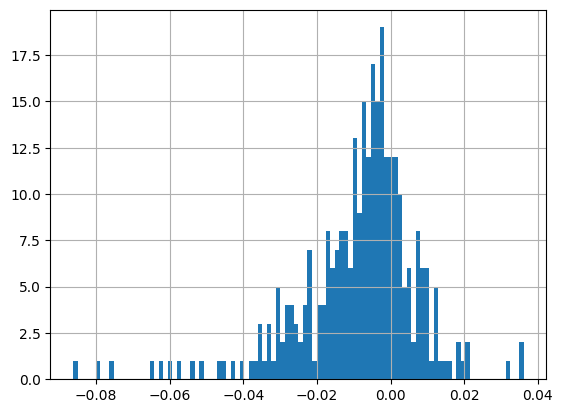

In [19]:
down_next_low = next_low.loc[~is_buy_up]
down_drop = (down_next_low / price_down).apply(np.log)
down_drop.hist(bins=100)

It seems that when the stock drop in price during the buy day, it would have more chance to have a high open.

Now let's take a look at the highs.

<AxesSubplot: >

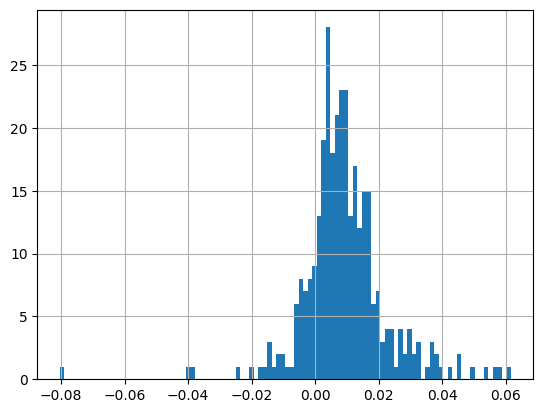

In [21]:
up_nex_high = next_high.loc[is_buy_up]
up_hyped = (up_nex_high / price_up).apply(np.log)
up_hyped.hist(bins=100)

<AxesSubplot: >

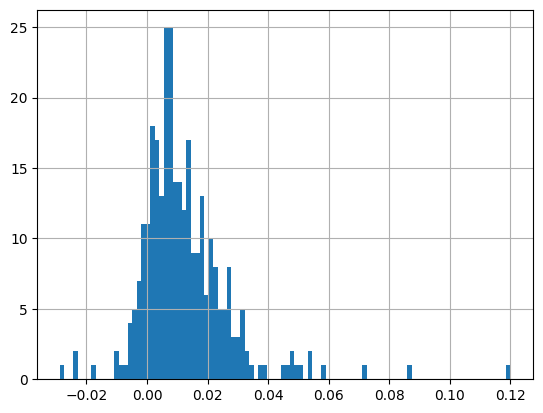

In [22]:
down_nex_high = next_high.loc[~is_buy_up]
down_hyped = (down_nex_high / price_down).apply(np.log)
down_hyped.hist(bins=100)

As you can, the stock is more likely to bounce higher when the stock had a drop during the buying day.

# Intraday Analysis

Now we have a better understanding on the daily changes, let's take a look at the price movement during the day (intraday).

### Download the intraday data

In [44]:
# @title Change this to get data for different intervals and time
start_date = "2021-01-01" # @param {type: "string"}
end_date = "2021-12-12" # @param {type: "string"}
interval = "1h" # @param {type: "string"}

ticker = yfinance.Ticker(symbol)
prices = ticker.history(interval=interval, start=start_date, end=end_date)

In [45]:
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-01-04 09:30:00-05:00,133.570007,133.611603,130.380005,131.053604,27653145,0.0,0
2021-01-04 10:30:00-05:00,131.054993,131.309998,129.399994,129.895004,20134055,0.0,0
2021-01-04 11:30:00-05:00,129.889893,130.089996,126.760002,128.250000,23694210,0.0,0
2021-01-04 12:30:00-05:00,128.246902,129.110001,127.630096,129.039795,14745063,0.0,0
2021-01-04 13:30:00-05:00,129.039993,129.199997,128.595001,128.960007,10861778,0.0,0
...,...,...,...,...,...,...,...
2021-12-10 11:30:00-05:00,176.304993,177.179993,175.733704,176.949997,11853609,0.0,0
2021-12-10 12:30:00-05:00,176.970001,177.664993,176.639999,177.619995,10372634,0.0,0
2021-12-10 13:30:00-05:00,177.610107,177.880005,177.330002,177.830002,8597330,0.0,0
2021-12-10 14:30:00-05:00,177.838394,178.199997,177.610001,177.925003,14462141,0.0,0


Grouping the intraday data into each days, then calculate the distribution between the average percentage movements.

In [50]:
# Create a date range between the data
date_range = pd.date_range(start=start_date, end=end_date, tz="America/New_York")

In [68]:
# Calculate the log percentage during the intraday periods using the high and low prices
intraday_pct_change = (prices.High / prices.Low).apply(np.log)

In [90]:
changes = []
max_chg = []
min_chg = []

# Looping through the date range
for date in date_range:
    # Change the date to open and close time
    a = date.replace(hour=9, minute=30)
    b = date.replace(hour=15, minute=30)
    # if the open date time not in data, then skip
    if b not in intraday_pct_change.index:
        continue
    # Create mask to the intraday data
    mask = pd.Series(intraday_pct_change.index).between(a, b)
    mask_date = intraday_pct_change.index[mask]
    # doing logic to get the percentage changes or prices' max movement range
    changes.append(intraday_pct_change.loc[mask_date].mean())
    max_chg.append(intraday_pct_change.loc[mask_date].max())
    min_chg.append(intraday_pct_change.loc[mask_date].min())

array([[<AxesSubplot: title={'center': 'Pct Change'}>]], dtype=object)

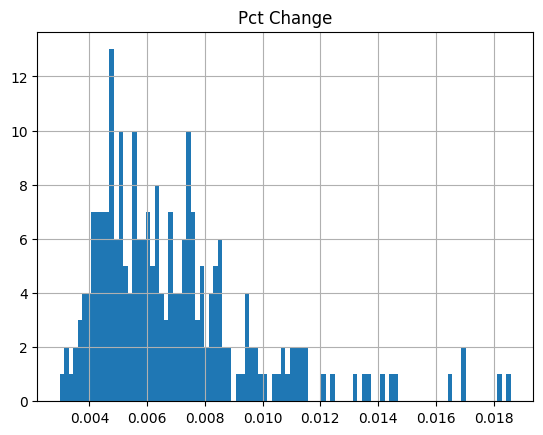

In [91]:
pct_change = pd.DataFrame(changes, columns=["Pct Change"])
pct_change.hist(bins=100)

array([[<AxesSubplot: title={'center': 'Max Pct Change'}>]], dtype=object)

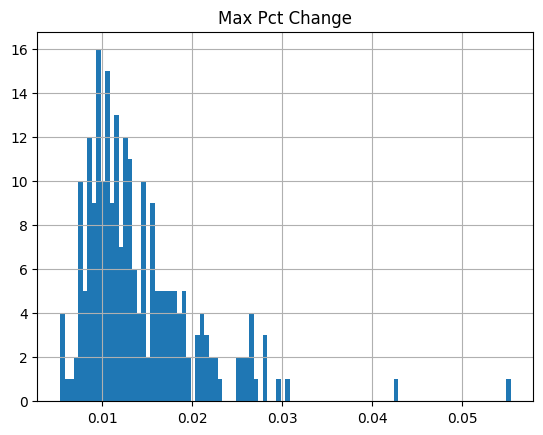

In [92]:
max_pct_change = pd.DataFrame(max_chg, columns=['Max Pct Change'])
max_pct_change.hist(bins=100)

array([[<AxesSubplot: title={'center': 'Max Pct Change'}>]], dtype=object)

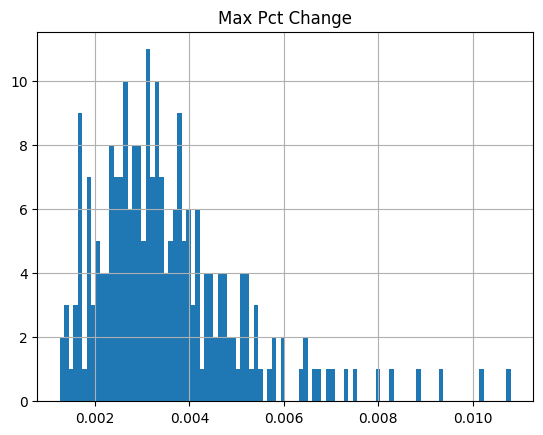

In [93]:
min_pct_change = pd.DataFrame(min_chg, columns=['Min Pct Change'])
min_pct_change.hist(bins=100)